**Lectura de datos**

In [2]:
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split
orl = fetch_olivetti_faces()
X = orl.data
y = orl.target
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, shuffle=True, random_state=23)

**Ajustamos parámetros del clasificador GaussianNB**

In [4]:
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
for v in [1e-9, 1e-5, 1e-1, .2, .5, 1]:
    clf = GaussianNB(var_smoothing=v).fit(X_train, y_train)
    acc = accuracy_score(y_test, clf.predict(X_test))
    print('La precisión de {0!s} es {1:.1%}'.format(clf, acc))

La precisión de GaussianNB() es 80.0%
La precisión de GaussianNB(var_smoothing=1e-05) es 80.0%
La precisión de GaussianNB(var_smoothing=0.1) es 86.7%
La precisión de GaussianNB(var_smoothing=0.2) es 85.8%
La precisión de GaussianNB(var_smoothing=0.5) es 82.5%
La precisión de GaussianNB(var_smoothing=1) es 80.8%


**PCA**

In [3]:
import numpy as np
m = np.mean(X_train, axis=0)
S = np.cov(X_train.T, bias=True)
La, U = np.linalg.eigh(S)
i = La.argsort()[::-1]; La = La[i]; U = U[:,i]

**Evaluamos el acierto en función del número de componentes PCA**

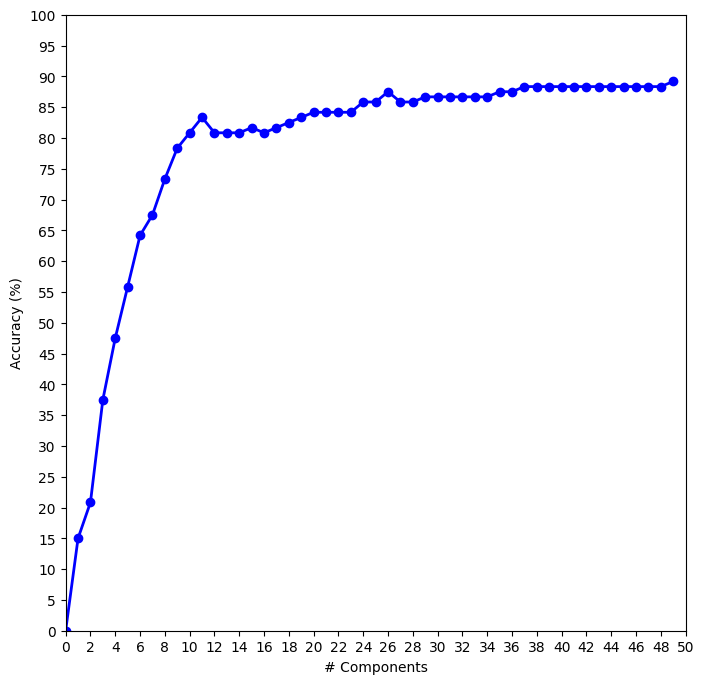

In [7]:
import matplotlib.pyplot as plt
v=0.1
K=50
acc= np.empty(K)
acc[0]=0.0
for k in np.arange(1, K):
  Xr_train = X_train @ U[:,0:k]
  Xr_test = X_test @ U[:,0:k]
  clf = GaussianNB(var_smoothing=v).fit(Xr_train, y_train)
  acc[k] = accuracy_score(y_test, clf.predict(Xr_test)) * 100
plt.figure(1, figsize=(8,8))
plt.axis([0, K, 0, 100])
plt.plot(acc, '-bo', linewidth=2)
plt.xlabel('# Components')
plt.ylabel('Accuracy (%)')
plt.xticks(np.arange(0,K+1,2))
plt.yticks(np.arange(0,101,5))
plt.show()